# 1 - Perkenalan

Nama Peneliti : Suma Bimantoro Andru

Objecktiv: Emotion Detection

Dataset:Emotion Detection

##<b>Abstraksi</b>

Penelitian ini dilatarbelakangi oleh data gambar dari dataset yang didapat dari `kaggle`, yang menunjukkan masing-masing emotion dari manusia,`terkadang manusia tidak tau ekspressi emotion apa yang sedang mereka ekspresikan`. Untuk merespons hal itu maka peneliti melakukan penelitian dan pembuatan modeling dengan menggunakan teknik `CNN` dan `algoritma sequential dengan bahasa program python beserta librarynnya untuk mengetahui ekspresi manusia`. Tujuan yang hendak dicapai pada penelitian ini antara lain: `(1) Mengetahui dengan jelas ekspresi manusia, (2) Membantu orang untuk menganalisa terhadap lawan jenis yang sedang diinterview atau diajak bicara, ini bisa membantu terhadap HRD di perusahaan ataupun pekerja proffesional psikolog. `

Penelitian ini dilakukan pada dataset yang sudah peneliti dapat dengan 7 jumlah emotion diantarannya `sedih`,`marah` dan lain-lain. 

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import Model 
import tensorflow as tf
from tensorflow import keras
import pickle
import requests
import json
import requests
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D,Dense, Dropout, Flatten,BatchNormalization
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.python.keras import regularizers

# 3 - Data Loading

In [2]:
!mkdir -p ~/.kaggle #bikin folder di kaggle root
!cp kaggle.json ~/.kaggle # copy paster kaggle.json ke folder kaggle 

!mkdir ./kaggle #bikin folder kaggle di lokasi sama (bukan di root)
!mv ./kaggle.json ./kaggle #move atau pindahi file kaggle.json ke folder kaggle

mkdir: cannot create directory ‘./kaggle’: File exists


In [3]:
!chmod 600 ~/.kaggle/kaggle.json #perizinan akses, hanya pemilik file yang memiliki akses baca dan tulis ke file
!ls ~/.kaggle #cek list data yang ada di folder kaggle

kaggle.json


In [4]:
#download dataset dari kaggle
!kaggle datasets download -d ananthu017/emotion-detection-fer

 71% 46.0M/65.2M [00:00<00:00, 258MB/s]
100% 65.2M/65.2M [00:00<00:00, 255MB/s]


In [5]:
#unzip
!unzip -q /content/emotion-detection-fer.zip -d images

In [6]:
#melihat isi direktori
os.listdir('/content/images')

['train', 'test']

In [7]:
#membuat mainpath
main_path= '/content/images'

In [8]:
#mendifinisikan train_dir dan test_dir dari path
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')

In [9]:
#Mendefinisikan ke variable untuk nanti kebutuhan di eda
train_angry = glob.glob(train_dir+"/angry/*.png")
train_disgusted = glob.glob(train_dir+"/disgusted/*.png")
train_fearful = glob.glob(train_dir+"/fearful/*.png")
train_happy = glob.glob(train_dir+"/happy/*.png")
train_neutral = glob.glob(train_dir+"/neutral/*.png")
train_sad = glob.glob(train_dir+"/sad/*.png")
train_surprised = glob.glob(train_dir+"/surprised/*.png")

test_angry = glob.glob(test_dir+"/angry/*.png")
test_disgusted = glob.glob(test_dir+"/disgusted/*.png")
test_fearful = glob.glob(test_dir+"/fearful/*.png")
test_happy = glob.glob(test_dir+"/happy/*.png")
test_neutral = glob.glob(test_dir+"/neutral/*.png")
test_sad = glob.glob(test_dir+"/sad/*.png")
test_surprised = glob.glob(test_dir+"/surprised/*.png")

# 4 - EDA

In [10]:
#print jumlah train
print('train set: \n' + '='*30)
num_angry= len(os.listdir(os.path.join(train_dir, 'angry')))
num_disgusted= len(os.listdir(os.path.join(train_dir, 'disgusted')))
num_fearful= len(os.listdir(os.path.join(train_dir, 'fearful')))
num_happy= len(os.listdir(os.path.join(train_dir, 'happy')))
num_neutral= len(os.listdir(os.path.join(train_dir, 'neutral')))
num_sad= len(os.listdir(os.path.join(train_dir, 'sad')))
num_surprised= len(os.listdir(os.path.join(train_dir, 'surprised')))

print(f'jumlah angry= {num_angry}')
print(f'jumlah disgusted= {num_disgusted}')
print(f'jumlah fearful= {num_fearful}')
print(f'jumlah happy= {num_happy}')
print(f'jumlah neutral= {num_neutral}')
print(f'jumlah sad= {num_sad}')
print(f'jumlah surprised= {num_surprised}')

train set: 
jumlah angry= 3995
jumlah disgusted= 436
jumlah fearful= 4097
jumlah happy= 7215
jumlah neutral= 4965
jumlah sad= 4830
jumlah surprised= 3171


Peneliti mempunyai dataset train yang sudah terfolder ada 7 emotion : `angry,disgusted,fearful,happy,neutral,sad,surprised`

In [11]:
#print jumlah test
print('test set: \n' + '='*30)
num_angry= len(os.listdir(os.path.join(test_dir, 'angry')))
num_disgusted= len(os.listdir(os.path.join(test_dir, 'disgusted')))
num_fearful= len(os.listdir(os.path.join(test_dir, 'fearful')))
num_happy= len(os.listdir(os.path.join(test_dir, 'happy')))
num_neutral= len(os.listdir(os.path.join(test_dir, 'neutral')))
num_sad= len(os.listdir(os.path.join(test_dir, 'sad')))
num_surprised= len(os.listdir(os.path.join(test_dir, 'surprised')))

print(f'jumlah angry= {num_angry}')
print(f'jumlah disgusted= {num_disgusted}')
print(f'jumlah fearful= {num_fearful}')
print(f'jumlah happy= {num_happy}')
print(f'jumlah neutral= {num_neutral}')
print(f'jumlah sad= {num_sad}')
print(f'jumlah surprised= {num_surprised}')

test set: 
jumlah angry= 958
jumlah disgusted= 111
jumlah fearful= 1024
jumlah happy= 1774
jumlah neutral= 1233
jumlah sad= 1247
jumlah surprised= 831


Peneliti mempunyai dataset test yang sudah terfolder ada 7 emotion : `angry,disgusted,fearful,happy,neutral,sad,surprised`

In [12]:
#/content/images/train/angry/im0.png
#mebuat fungsi membuat data frame
def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        ##ambil nama dari file \ ke -1
        # images.append(image.split('\')[-1]) 
        # label.append(image.split('\')[-2])
        data.append((image, image.split('/')[-2]))
    return pd.DataFrame(data, columns=['images', 'label'])

train_df = create_dataframe(train_angry + train_disgusted +train_fearful+train_happy+train_neutral+train_sad+train_surprised)
train_df = train_df.sample(frac=1, random_state=1).reset_index(drop=True)

test_df = create_dataframe(test_angry  + test_disgusted+test_fearful+test_happy+test_neutral+test_sad+test_surprised)
test_df = test_df.sample(frac=1, random_state=1).reset_index(drop=True)

Peneliti membuat fungsi dimana `fungsi tersebut nanti akan mempermudah peneliti untuk membuat dataframe`, dikarenakan data adalah berupa gambar, maka peneliti membuat dataframe dengan 2 column dimana column tersebut adalah `images dan label`

In [13]:
#menampilkan train head
print(train_df.shape)
train_df.head()

(28709, 2)


,images,label
0,/content/images/train/angry/im639.png,angry
1,/content/images/train/fearful/im2904.png,fearful
2,/content/images/train/happy/im6621.png,happy
3,/content/images/train/sad/im1904.png,sad
4,/content/images/train/sad/im3444.png,sad


In [14]:
#menampilkan test head
print(test_df.shape)
test_df.head()

(7178, 2)


,images,label
0,/content/images/test/sad/im655.png,sad
1,/content/images/test/fearful/im473.png,fearful
2,/content/images/test/happy/im181.png,happy
3,/content/images/test/neutral/im799.png,neutral
4,/content/images/test/happy/im1019.png,happy


setelah menjadi dataframe , `colums images menjadi path lokasi image tersebut`.

In [15]:
#split
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=1, stratify = train_df['label'])
print(train_df.shape)
print(val_df.shape)

(22967, 2)
(5742, 2)


Dikarenakan peneliti butuh data train,test dan validation untuk pelatihan model nantinnya, dan saat ini peneliti hanya mempunyai train dan tes, maka peneliti membuat `val_df` dan mengambil `sebesar 20% dari data train`.

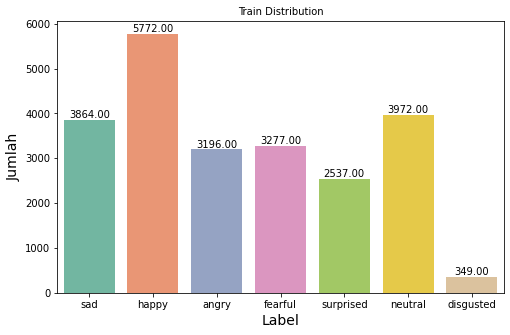

In [16]:
#membuat fungsi untuk visualisasi plot
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("Jumlah", size=14)
    # plt title base on name of 
    plt.title(f"{label} Distribution", size=10)
    plt.show()

visualize_data(train_df, 'Train')

In [17]:
#melihat jumlah dan persen terhadap column train
(train_df['label'].value_counts()/train_df['label'].count())*100

happy        25.131711
neutral      17.294379
sad          16.824139
fearful      14.268298
angry        13.915618
surprised    11.046284
disgusted     1.519572
Name: label, dtype: float64

ada 7 label dimana: <br>
`happy:25% `<br>
`neutral:17%` <br>
`sad:16%` <br>
`fearful:14% `<br>
`angry:13.9%`<br>
`suprised:11%`<br>
`disgusted:1.5`<br>

Terbanyak data gambar berlabel happy sebsar 25% dan terendah disgusted dengan nilai 1.5%

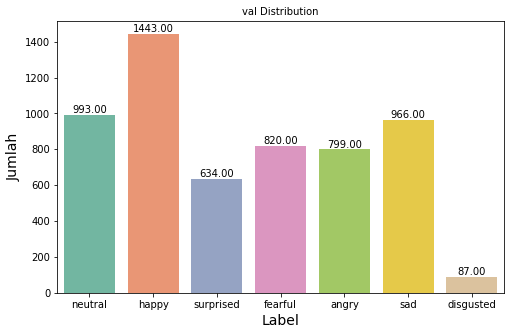

In [18]:
visualize_data(val_df, 'val')


In [19]:
#melihat jumlah dan persen terhadap column val
(val_df['label'].value_counts()/val_df['label'].count())*100

happy        25.130617
neutral      17.293626
sad          16.823406
fearful      14.280738
angry        13.915012
surprised    11.041449
disgusted     1.515152
Name: label, dtype: float64

Jumlah banyak data sama seperti train, karena belum di setting oleh peneliti, dan akan dilakukan pada saat preproces

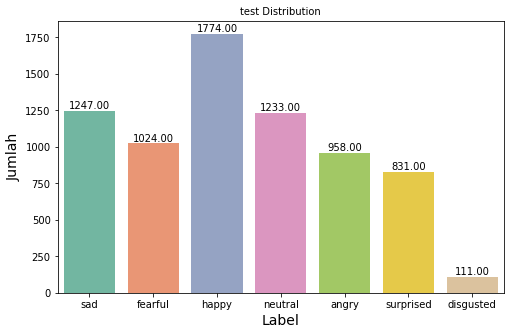

In [20]:
visualize_data(test_df, 'test')

In [21]:
#melihat jumlah dan persen terhadap column test
(test_df['label'].value_counts()/test_df['label'].count())*100

happy        24.714405
sad          17.372527
neutral      17.177487
fearful      14.265812
angry        13.346336
surprised    11.577041
disgusted     1.546392
Name: label, dtype: float64

Kesimpulan sama seperti data train terbanyak happy dan terendah disgusted

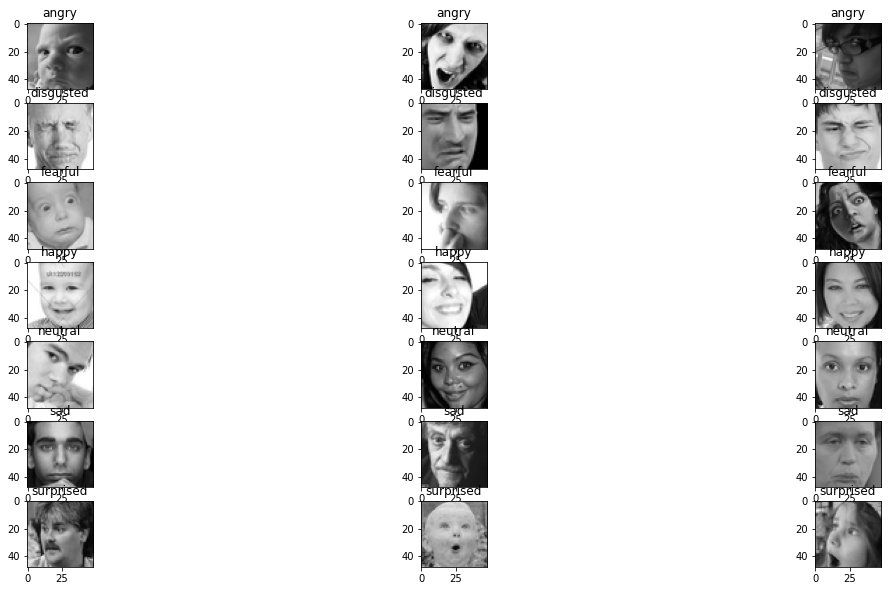

In [22]:
# Get few samples for both the classes
angry_samples = (train_df[train_df['label']=="angry"]['images'].iloc[:3]).tolist()
disgusted_samples = (train_df[train_df['label']=='disgusted']['images'].iloc[:3]).tolist()
fearful_samples = (train_df[train_df['label']=='fearful']['images'].iloc[:3]).tolist()
happy_samples = (train_df[train_df['label']=='happy']['images'].iloc[:3]).tolist()
neutral_samples = (train_df[train_df['label']=='neutral']['images'].iloc[:3]).tolist()
sad_samples = (train_df[train_df['label']=='sad']['images'].iloc[:3]).tolist()
surprised_samples = (train_df[train_df['label']=='surprised']['images'].iloc[:3]).tolist()

# visualize sample images
def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(20,10))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//3, i%3].set_title(sample.split('/')[-2])
        ax[i//3, i%3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples(angry_samples + disgusted_samples+fearful_samples+happy_samples+neutral_samples+sad_samples+surprised_samples)

Menampilkan data sample berupa gambar, dan terlihat dataset berbentuk hitam dan putih, untuk melihat ekspresi mereka, `personal adjustmen peneliti, setelah peneliti lihat ekspresi foto dan gambar seudah sesuai.`

# 5 - Data Preprocessing

## Augmentasi Data

In [23]:
#memberikan nilai kepada gambar,seed dan batch
img_height= 48
img_width= 48
SEED = 1
BATCH =128

In [24]:
# create image generator
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisasi pixel
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

vaL_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Pada perintah diatas kita melakukan membuat image generator dan peneliti definisikan dengan `variable train_datagen`
dimana arti perintah tersebut:

Rescaling data menjadi 1/255.<br>
Rotation range 0.1 <br>
width_shift_range=0.2 <br>
height_shift_range=0.2, <br>
Shearing image skala 0.2 <br>
Zooming image dengan range 0.2 <br>
dan melakukan Horizontal flip

In [25]:
# dari dataframe bukan directory
train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width), #pixel
    color_mode = "grayscale",
    class_mode='categorical',
    batch_size=BATCH,
    subset = "training",
    shuffle=True,
    seed=SEED)

validation = vaL_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width), #pixel
    color_mode = "grayscale",
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width), #pixel
    color_mode = "grayscale",
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

Found 22967 validated image filenames belonging to 7 classes.
Found 5742 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


Membuat dataframe dan menyesuaikan validasi sebesar 20% dari data train, dan mendefinisikan dari data generator ,`dan sekarang data sudah siap dipakai`.

In [26]:
train.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

Berikut adalah indikasi angka jika berekspresi
 `'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6`

# 6 -Sequential Modeling

In [27]:
#buat callback
callbacks1 = [ 
    EarlyStopping(monitor = 'val_loss', patience = 4), 
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
 ] # saving the best model

Membuat Call back bernilai patience=4, dimana diartikan jika misal train epoch 1 sampai ke 4, selalu lebih tinggi dari epoch 1 , maka akan berenti dan mendapatkan nilai terbaik

## 6.1 - Model Definition baseline

In [28]:
#Definisi model baseline
# inputs= [img_height,img_width,1]#input shape
model_seq= tf.keras.models.Sequential()
#filter 1
model_seq.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=[48,48,1])) #input
#pooling1
model_seq.add(MaxPooling2D(2))
#filter 2
model_seq.add(Conv2D(256, 3, activation="relu", padding="same"))
#pooling2
model_seq.add(MaxPooling2D(2))
#flatten
model_seq.add(Flatten())
#hiden 1
model_seq.add(Dense(64,activation = 'relu'))
#output layer
model_seq.add(Dense(7, activation='softmax'))#output layer
#compile
model_seq.compile(
    optimizer = 'Adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

Peneliti disini menggunakan `32 filters dan 2 feature dan 3 kernel`, dengan `output layer 7 neuron`, dengan ditambahkan aktivasi relu dimana untuk menyalakan neuron ,untuk aktifasi peneliti memilih `Softmax dimana softmax untuk clasisifikasi lebih dari 2 atau multiclass` , disini peneliti untuk menerapkan `baseline model memakai Softmax`. Untuk loss peneliti memakai `categorical_crossentropy`, `categorical_crossentropy adalah fungsi loss default yang digunakan untuk masalah klasifikasi multiclasss`, dan Ini dimaksudkan untuk digunakan dengan klasifikasi multiclass di mana nilai target berada di set lebih dari 2 pilihan, untuk baseline peneliti mencoba memakai optimizer `Adam`, dan untuk metrics memakai `accuracy`, dikarenakan `peniliti membuat model untuk case classification`.

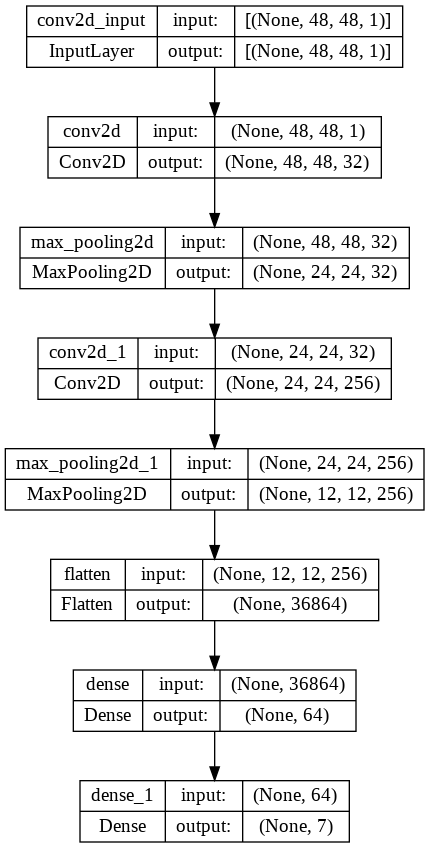

In [29]:
tf.keras.utils.plot_model(model_seq, show_shapes=True)

Terlihat kepada plot model Sequential baseline dimana `feature input dan output sama`,dan dibawahnya dengan input `feature dan output conv2d` dimana filter, peneliti memasukan 32, dan di bawahnnya `flatten 32 dengan nilai output 15548800 neuron`, lalu nilai `flatten menuju neuron dimana peneliti memasukan 64, lalu ke output dengan 7 output, dengan peneliti memberi 7 neuron`

In [30]:
#melihat summary model baseline
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 64)                2

Terlihat total params untuk baseline `model 2.434.119 juta, dengan 2 filter , 1 pooling, dan 2 hidden layer`

## 6.2 - Model Training

In [31]:
## Train the Model

%%time
history= model_seq.fit(train, batch_size= BATCH, epochs= 10, validation_data= validation) 



Epoch 1/10
180/180 [==============================] - 29s 113ms/step - loss: 1.7855 - accuracy: 0.2581 - val_loss: 1.6959 - val_accuracy: 0.2900
Epoch 2/10
180/180 [==============================] - 20s 111ms/step - loss: 1.7072 - accuracy: 0.3031 - val_loss: 1.6610 - val_accuracy: 0.3393
Epoch 3/10
180/180 [==============================] - 20s 108ms/step - loss: 1.6476 - accuracy: 0.3434 - val_loss: 1.5403 - val_accuracy: 0.4065
Epoch 4/10
180/180 [==============================] - 21s 118ms/step - loss: 1.5891 - accuracy: 0.3811 - val_loss: 1.4546 - val_accuracy: 0.4505
Epoch 5/10
180/180 [==============================] - 19s 108ms/step - loss: 1.5474 - accuracy: 0.4007 - val_loss: 1.4295 - val_accuracy: 0.4511
Epoch 6/10
180/180 [==============================] - 19s 107ms/step - loss: 1.5045 - accuracy: 0.4240 - val_loss: 1.3998 - val_accuracy: 0.4643
Epoch 7/10
180/180 [==============================] - 20s 108ms/step - loss: 1.4755 - accuracy: 0.4324 - val_loss: 1.3451 - val_ac

untuk baseline model, peneliti melakukan epoch 10, dimana `epoch` adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran

## 6.3 - Model Evaluation

In [32]:
y_pred_seq = model_seq.predict(test)
print('baseline')
print(classification_report(test.classes, np.array(y_pred_seq).argmax(axis=1)))

57/57 [==============================] - 2s 39ms/step
baseline
              precision    recall  f1-score   support

           0       0.13      0.09      0.10       958
           1       0.00      0.00      0.00       111
           2       0.12      0.03      0.05      1024
           3       0.24      0.40      0.30      1774
           4       0.17      0.26      0.21      1233
           5       0.16      0.08      0.11      1247
           6       0.13      0.12      0.12       831

    accuracy                           0.19      7178
   macro avg       0.13      0.14      0.13      7178
weighted avg       0.16      0.19      0.16      7178



`Terlihat accuracy 18%, padahal setelah di train dan epoch accurasi mencapai 44%.`

precission disini adalah berhasilnya menebak dari data support sebanyak hasil, jika dilihat dari `class 0` angka 0.12 artinya sebanyak 12% berhasil menebak dan 88% menebak salah,
dan `recall disini sebesar 8% yang artinnya berhasil menebak 8% dan sisa 92% itu adalah data selain class tersebut`, begitu pula di kelas 1-6.

In [33]:
# Create Dataframe

history_seq_df = pd.DataFrame(history.history)

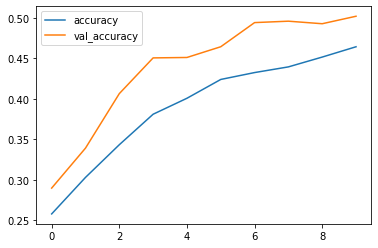

In [34]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

Peneliti melihat, `model sangat baik dikarenakan, setiap penambahan epoch accurasi meningkat,dan dan val juga lebih tinggi dari train`.

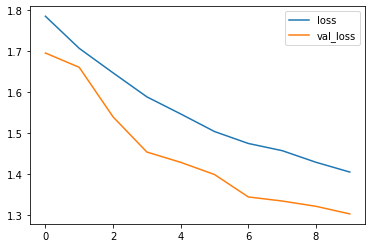

In [35]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

Peneliti melihat, kemampuan belajar sudah baik, karena loss turun dengan bertambahnnya EPOCH val dan train.

#Model Improvement

In [36]:
#Definisi model baseline
# inputs= [img_height,img_width,1]#input shape
model_seq1= tf.keras.models.Sequential()
#filter 1
model_seq1.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=[48,48,1])) #input
#pooling1
model_seq1.add(MaxPooling2D(2))

#filter 2
model_seq1.add(Conv2D(256, 3, activation="relu", padding="same"))
#pooling1
model_seq1.add(MaxPooling2D(2))

#filter 1.1
model_seq1.add(Conv2D(512, 3, activation="relu", padding="same"))
#pooling1
model_seq1.add(MaxPooling2D(2))


#filter 2.1
model_seq1.add(Conv2D(512, 3, activation="relu", padding="same"))
#pooling1
model_seq1.add(MaxPooling2D(2))



#flatten
model_seq1.add(Flatten())


#hiden 1
model_seq1.add(Dense(512,activation = 'relu',kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
#hiden 2
model_seq1.add(Dense(246,activation = 'relu'))
#hiden 3
model_seq1.add(Dense(16,activation = 'relu'))



#output layer
model_seq1.add(Dense(7, activation='softmax'))#output layer

# #model compile
model_seq1.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

#model compile
# model_seq1.compile(loss="categorical_crossentropy",
#               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
#               metrics = [tf.keras.metrics.Recall()])
model_seq1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 256)       37120     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 512)       1180160   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 512)       

untuk `improvement 6.067.325 juta parameter`, `sebelum improvement sebesar 2,434,119`

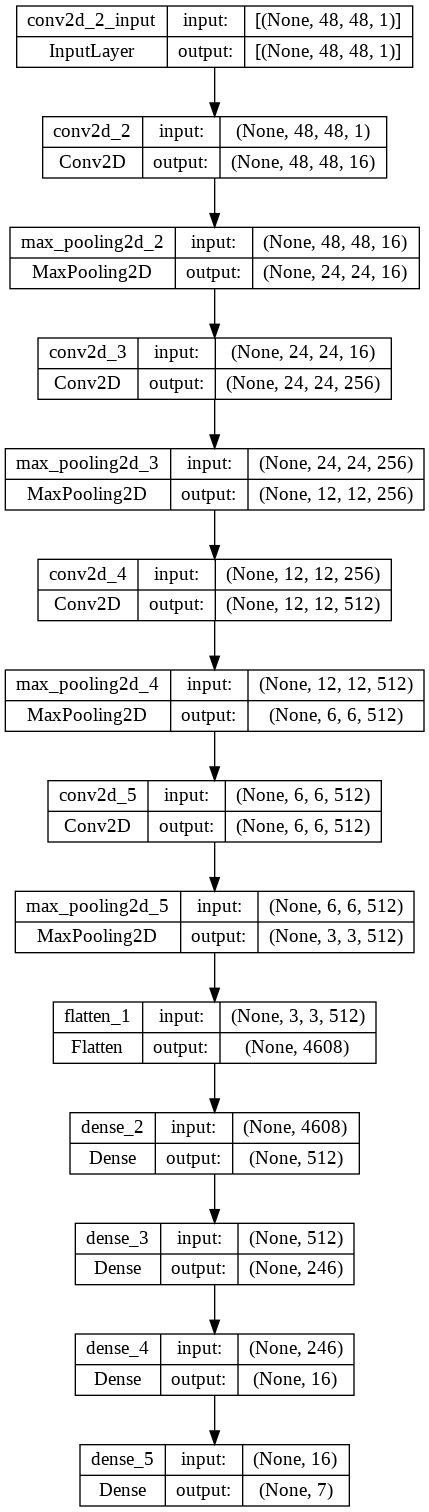

In [37]:
#show plot sumarry
tf.keras.utils.plot_model(model_seq1, show_shapes=True)

Untuk model improvment, ada penambahan di filter, hidden dan kernel.

In [38]:
#train Model
his1= model_seq1.fit(train, batch_size= BATCH, epochs= 35, validation_data= validation)

Epoch 1/35
180/180 [==============================] - 23s 120ms/step - loss: 1.8434 - accuracy: 0.2349 - val_loss: 1.8087 - val_accuracy: 0.2513
Epoch 2/35
180/180 [==============================] - 20s 113ms/step - loss: 1.7874 - accuracy: 0.2582 - val_loss: 1.7573 - val_accuracy: 0.2696
Epoch 3/35
180/180 [==============================] - 21s 114ms/step - loss: 1.7354 - accuracy: 0.2973 - val_loss: 1.6617 - val_accuracy: 0.3438
Epoch 4/35
180/180 [==============================] - 21s 114ms/step - loss: 1.6744 - accuracy: 0.3313 - val_loss: 1.5554 - val_accuracy: 0.4002
Epoch 5/35
180/180 [==============================] - 21s 115ms/step - loss: 1.6101 - accuracy: 0.3721 - val_loss: 1.4968 - val_accuracy: 0.4220
Epoch 6/35
180/180 [==============================] - 21s 114ms/step - loss: 1.5550 - accuracy: 0.3932 - val_loss: 1.4448 - val_accuracy: 0.4415
Epoch 7/35
180/180 [==============================] - 20s 113ms/step - loss: 1.5146 - accuracy: 0.4156 - val_loss: 1.4865 - val_ac

setelah peneliti coba, maksimal untuk model ini ada epoch 35, setelah epoch 35 model over vit, dimana train jauh lebih tinggi dari validasi, `untuk validasi berenti di 60-62%, peneliti sudah mencoba epoch 200`, dan `accuracy train mencapai 91% dan validasi tetap di 60%`, jadi peneliti memutuskan untuk memakai `epoch 35`, peneliti juga sudah mencoba memakai `callback patien 4`, ketika sampai di `accuracy 30% `callback berenti, jadi peneliti memutuskan manual dan `epoch 200`, peneliti melihat setelah epoch 35, tidak ada kenaikan signifikan di `validasi dan berhenti di angka 60%`.

In [39]:
y_pred_seq1 = model_seq1.predict(test)
print('setelah improvment')
print(classification_report(test.classes, np.array(y_pred_seq1).argmax(axis=1)))


57/57 [==============================] - 2s 41ms/step
setelah improvment
              precision    recall  f1-score   support

           0       0.14      0.16      0.15       958
           1       0.00      0.00      0.00       111
           2       0.13      0.04      0.06      1024
           3       0.26      0.31      0.29      1774
           4       0.18      0.21      0.19      1233
           5       0.18      0.17      0.18      1247
           6       0.11      0.12      0.12       831

    accuracy                           0.19      7178
   macro avg       0.14      0.15      0.14      7178
weighted avg       0.18      0.19      0.18      7178



precission disini adalah berhasilnya menebak dari data support sebanyak hasil, jika dilihat dari `class 0` angka 0.0.14 artinya sebanyak 14% berhasil menebak dan 86% menebak salah,
dan `recall disini sebesar 14% yang artinnya berhasil menebak 14% dan sisa 86% itu adalah data selain class tersebut`, begitu pula di kelas 1-6.

In [40]:
#buat dataframe
history_seq1_df = pd.DataFrame(his1.history)

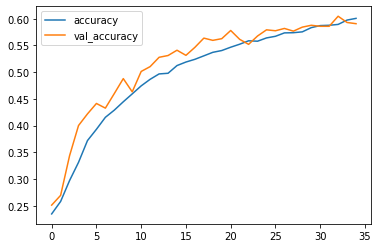

In [41]:
# Plot between Accuracy and val_accuracy

history_seq1_df[['accuracy', 'val_accuracy']].plot()

model train cukup bagus dan 60% keatas terlihat ada indikasi overfit

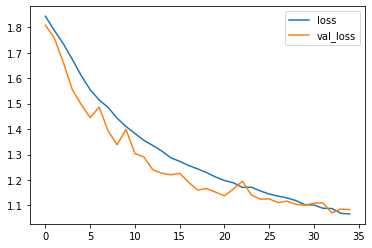

In [42]:
# Plot between loss and val_loss

history_seq1_df[['loss', 'val_loss']].plot()

Model terlihat cukup bagus tetapi ada indikasi overfit jika diteruskan epochnya.

base model
after improvement


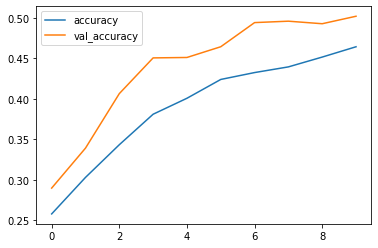

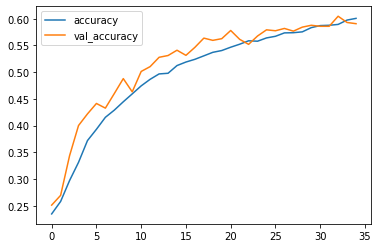

In [43]:
print('base model')
history_seq_df[['accuracy', 'val_accuracy']].plot()
print('============================================')
print('after improvement')
history_seq1_df[['accuracy', 'val_accuracy']].plot()

Perbandingan baseline dan improvement, `improvement lebih bagus karena mendapat 60% accurasi dan sebelum improvment 40-50% sudah ada indikasi overvit`.

In [44]:
y_pred_seq = model_seq.predict(test)
y_pred_seq1 = model_seq1.predict(test)

57/57 [==============================] - 2s 40ms/step


In [45]:
#clasification report
print('sebelum improvment')
print(classification_report(test.classes, np.array(y_pred_seq).argmax(axis=1)))
print('===================================================================')
print('setelah improvment')
print(classification_report(test.classes, np.array(y_pred_seq1).argmax(axis=1)))

sebelum improvment
              precision    recall  f1-score   support

           0       0.15      0.10      0.12       958
           1       0.00      0.00      0.00       111
           2       0.15      0.04      0.07      1024
           3       0.24      0.39      0.30      1774
           4       0.18      0.27      0.21      1233
           5       0.20      0.10      0.13      1247
           6       0.11      0.10      0.10       831

    accuracy                           0.19      7178
   macro avg       0.15      0.14      0.13      7178
weighted avg       0.18      0.19      0.17      7178

setelah improvment
              precision    recall  f1-score   support

           0       0.15      0.17      0.16       958
           1       0.00      0.00      0.00       111
           2       0.13      0.04      0.06      1024
           3       0.25      0.31      0.28      1774
           4       0.17      0.21      0.19      1233
           5       0.17      0.16      0

Terlihat disini ada kenaikan rata-rata setelah improvement, dan model tidak bisa membaca class 1, `dikarenakan dataset yang kurang banyak dari class 1`, dan `kurangnnya pixel dari dataset, yang menyebabkan model kurang bagus`

#7 - MODEL INFERENCE / TESTING

(48, 48)


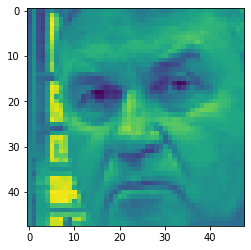

In [47]:
 #uploud image
img = keras.utils.load_img("/content/im0.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [48]:
#preedik dengan model
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model_seq1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

1/1 [==============================] - 0s 225ms/step
[1.0, 0.0, 2.1102172e-17, 0.0, 0.0, 0.0, 0.0]
Angry


Model berhasil memprediksi ekspresi marah, artinya model berhasil

#8 - KESIMPULAN

EDA:<br>
Peneliti mempunyai dataset train yang sudah terfolder ada 7 emotion : `angry,disgusted,fearful,happy,neutral,sad,surprised`
Peneliti membuat fungsi dimana `fungsi tersebut nanti akan mempermudah peneliti untuk membuat dataframe`, dikarenakan data adalah berupa gambar,maka peneliti membuat dataframe dengan 2 column dimana column tersebut adalah `images dan label` setelah menjadi dataframe , `colums images menjadi path lokasi image tersebut`.Dikarenakan peneliti butuh data train,test dan validation untuk pelatihan model nantinnya, dan saat ini peneliti hanya mempunyai train dan tes, maka peneliti membuat `val_df` dan mengambil `sebesar 20% dari data train`.Terbanyak data gambar berlabel happy sebsar 25% dan terendah disgusted dengan nilai 1.5%,Jumlah banyak data sama seperti train, karena belum di setting oleh peneliti, dan akan dilakukan pada saat preproces.Kesimpulan sama seperti data train terbanyak happy dan terendah disgusted.
Menampilkan data sample berupa gambar, dan terlihat dataset berbentuk hitam dan putih, untuk melihat ekspresi mereka, 
`personal adjustmen peneliti, setelah peneliti lihat ekspresi foto dan gambar seudah sesuai.`

Proccesing:
Pada perintah diatas kita melakukan membuat image generator dan peneliti definisikan dengan `variable train_datagen`
dimana arti perintah tersebut:

-Rescaling data menjadi 1/255.<br>
-Rotation range 0.1 <br>
-width_shift_range=0.2 <br>
-height_shift_range=0.2, <br>
-Shearing image skala 0.2 <br>
-Zooming image dengan range 0.2 <br>
-dan melakukan Horizontal flip<br>

Membuat dataframe dan menyesuaikan validasi sebesar 20% dari data train, 
dan mendefinisikan dari data generator ,`dan sekarang data sudah siap dipakai`.

modeling:<br>
Membuat Call back bernilai patience=4, dimana diartikan jika misal train epoch 1 sampai ke 4, selalu lebih tinggi dari epoch 1 , maka akan berenti dan mendapatkan nilai terbaik,
Peneliti disini menggunakan `32 filters dan 2 feature dan 3 kernel`, dengan `output layer 7 neuron`, dengan 
ditambahkan aktivasi relu dimana untuk menyalakan neuron ,untuk aktifasi peneliti memilih `Softmax dimana softmax untuk clasisifikasi lebih dari 2 atau multiclass` , disini peneliti untuk menerapkan `baseline model memakai Softmax`. Untuk loss peneliti.memakai`categorical_crossentropy``categorical_crossentropy adalah fungsi loss default yang digunakan untuk masalah klasifikasi multiclasss`, dan Ini dimaksudkan untuk digunakan dengan klasifikasi multiclass di mana nilai target berada di set lebih dari 2 pilihan,untuk baseline peneliti mencoba memakai optimizer `Adam`, dan untuk metrics memakai `accuracy`, dikarenakan `peniliti membuat model untuk case classification`,Terlihat kepada plot model Sequential baseline dimana `feature input dan output sama`,dan dibawahnya dengan input `feature dan output conv2d`dimana filter, peneliti memasukan 32, dan di bawahnnya `flatten 32 dengan nilai output 15548800 neuron`, lalu nilai `flatten menuju neuron dimana peneliti memasukan 64, lalu ke output dengan 7 output, dengan peneliti memberi 7 neuron` Terlihat total params untuk baseline `model 2.434.119 juta, dengan 2 filter , 1 pooling, dan 2 hidden layer`
untuk baseline model, peneliti melakukan epoch 10, dimana `epoch` adalah ketika seluruh dataset sudah melalui proses
training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, precission disini adalah berhasilnya menebak dari data support sebanyak hasil, jika dilihat dari `class 0` angka 0.12 artinya sebanyak 12% berhasil menebak dan 88% menebak salah,
dan `recall disini sebesar 8% yang artinnya berhasil menebak 8% dan sisa 92% itu adalah data selain class 
tersebut`, begitu pula di kelas 1-6.
Peneliti melihat, `model sangat baik dikarenakan, setiap penambahan epoch accurasi meningkat,dan dan val juga lebih tinggi dari train`.
Peneliti melihat, kemampuan belajar sudah baik, karena loss turun dengan bertambahnnya EPOCH val dan train.
untuk `improvement 6.067.325 juta parameter`, `sebelum improvement sebesar 2,434,119`.
setelah peneliti coba, maksimal untuk model ini ada epoch 35, setelah epoch 35 model over vit, dimana train jauh lebih tinggi dari validasi,
 `untuk validasi berenti di 60-62%, peneliti sudah mencoba epoch 200`, dan `accuracy train mencapai 91% dan validasi tetap di 60%`, jadi peneliti
 memutuskan untuk memakai `epoch 35`, peneliti juga sudah mencoba memakai `callback patien 4`, ketika sampai di `accuracy 30% `callback berenti,
 jadi peneliti memutuskan manual dan `epoch 200`, peneliti melihat setelah epoch 35, tidak ada kenaikan signifikan di `validasi dan berhenti di angka 60%`.
precission disini adalah berhasilnya menebak dari data support sebanyak hasil, jika dilihat dari `class 0` angka 0.0.14 artinya sebanyak 14% berhasil menebak 
dan 86% menebak salah,dan `recall disini sebesar 14% yang artinnya berhasil menebak 14% dan sisa 86% itu adalah data selain class tersebut`, begitu pula di kelas 1-6.
model train cukup bagus dan 60% keatas terlihat ada indikasi overfit.
Model terlihat cukup bagus tetapi ada indikasi overfit jika diteruskan epochnya.
Perbandingan baseline dan improvement, `improvement lebih bagus karena mendapat 60% accurasi dan 
sebelum improvment 40-50% sudah ada indikasi overvit`.
Terlihat disini ada kenaikan rata-rata setelah improvement, dan model tidak bisa membaca class 1, `dikarenakan dataset yang kurang banyak dari class 1`,
 dan `kurangnnya pixel dari dataset, yang menyebabkan model kurang bagus`,
<br>
Insight:<br>
`perbanyak dataset disgusted dan , karena data imbalance jadi model tidak terlalu bagus.`


#9.Freeze

In [49]:
# freeze model
model_seq1.trainable = False

#10-SAVING MODEL

In [56]:
#save model
model_seq1.save("model_seq1")

In [59]:
#lakukan zip
! zip -r model_seq1.zip model_seq1

  adding: model_seq1/ (stored 0%)
  adding: model_seq1/keras_metadata.pb (deflated 93%)
  adding: model_seq1/saved_model.pb (deflated 89%)
  adding: model_seq1/variables/ (stored 0%)
  adding: model_seq1/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: model_seq1/variables/variables.index (deflated 69%)
  adding: model_seq1/assets/ (stored 0%)


In [58]:
#download h5
model_seq1.save("model_seq1.h5")

In [53]:
# #save pipline
# pickle.dump(preprocess, open('preprocess.pkl', 'wb'))